<a href="https://colab.research.google.com/github/Theano2247/NFTs/blob/main/OS_NFTs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Collection data from OpenSea
## Questions to answer:

*   How many trait categories do collections have?
*   How many items in traits?
*   What are the distributions and rarity percentages?


In [ ]:
# load libraries
import requests
import json
import pandas as pd
import numpy as np
import csv

pd.set_option('display.max_colwidth', 1000)
pd.set_option('display.float_format', None)

# Data Collection


 **Please note that data collection requires OpenSea API keys**

 **Please proceed to Data Views, which uses an API call to my personal API, where I have load the collected/processed dataset.**


In [ ]:
# load libraries
import requests
import json
import pandas as pd
import numpy as np
import csv

pd.set_option('display.max_colwidth', 1000)
pd.set_option('display.float_format', None)


In [ ]:
#TOP ETH PFP collections by all-time volume collected by hand from OS website (https://opensea.io/rankings?sortBy=total_volume&category=pfps&chain=ethereum)

top_collections = [
  'boredapeyachtclub','mutant-ape-yacht-club','azuki','clonex','proof-moonbirds',
  'doodles-official','bored-ape-kennel-club','pudgypenguins','meebits','beanzofficial','cool-cats-nft',
  'milady','world-of-women-nft','thecaptainz','mfers','veefriends','goblintownwtf',
  'hapeprime','invisiblefriends','mekaverse','thepotatoz','fluf',
  'pxnghostdivision','karafuru','genesis-creepz','nakamigos','hashmasks','moonbirds-oddities',
  'official-v1-punks','cyberbrokers','lilpudgys','3landers','phantabear','cyberkongz-vx','rektguy',
  'sappy-seals','kaiju-kingz','lazy-lions','world-of-women-galaxy','metahero-mintpass',
  'coolpetsnft','alienfrensnft','primeapeplanetpap','the-doge-pound','digidaigaku','cyberkongz',
  'guttercatgang','coolmans-universe','degentoonz-collection','capsulehouse',
  'killabears','supducks','nouns','livesofasuna','remilio-babies','cryptoskulls',
  'chimpersnft','acclimatedmooncats','killergf','the-weirdo-ghost-gang','muribyfabrik',
  'metahero-generative','quirkiesoriginals','kanpai-pandas','jungle-freaks-genesis','bears-deluxe','lil-heroes-by-edgar-plans',
  'tubby-cats','galacticapes','forgottenruneswizardscult','cryptobatz-by-ozzy-osbourne','io-imaginary-ones','mutantcats',
  'cryptodickbutts-s3','kprverse','bossbeauties','theshiboshis','genuine-undead','anonymice',
  'robotos-official','genuine-undead','akutars','hype-bears-club-official-','thesaudis','raidpartyfighters','moonrunnersnft',
  'rare-apepes','wonderpals','c-01-official-collection','zombieclub-token','chain-runners-nft','the-crypto-chicks',
]

In [ ]:
# Trait info collector
# Get collection information
all_data = {}

for collection in top_collections:
  url = "https://api.opensea.io/api/v2/traits/{}".format(collection)
  headers = {"X-API-KEY": "Please insert your API"}
  response = requests.get(url, headers=headers)
  json_response = response.json()

  collection_name = collection

  # Extract data from the response
  collection_name = collection
  categories = json_response.get('categories', {})
  counts = json_response.get('counts', {})

  # Create a list for the current collection if not exists
  all_data.setdefault(collection_name, [])

  # Count number of traits for each category
  trait_values = {}
  for count in counts:
    num_trait = len(counts[count])
    category, value = count, num_trait
    trait_values[count] = value

  # Calculate total combination
  combination = 1
  for value in trait_values.values():
      combination *= value

  # Append data for the current collection to the list
  all_data[collection_name].append({
      'num_categories': len(categories),
      'combinations': combination,
      'categories': trait_values,
      'counts': counts,
      })


In [ ]:
# General NFT data collector

nft_data = pd.DataFrame()

data_list = []

for collection in top_collections:
  url = "https://api.opensea.io/api/v2/traits/{}".format(collection)
  headers = {"X-API-KEY": "Please insert your API"}
  response = requests.get(url, headers=headers)
  json_response = response.json()

  nft_data['collection_slug'] = [collection]

  categories = json_response.get('categories', {})
  num_traits = len(categories)

  counts = json_response.get('counts', {})

  trait_values = {}
  for count in counts:
    num_trait = len(counts[count])
    category, value = count, num_trait
    trait_values[count] = value

  traits = ', '.join(trait_values.keys())

  # Calculate total combination
  combination = 1
  for value in trait_values.values():
      combination *= value

  url = "https://api.opensea.io/api/v2/collections/{}".format(collection)

  response = requests.get(url, headers=headers)
  json_response = response.json()

  collection_name = json_response['name']

  project_url = json_response['project_url']
  total_supply = json_response['total_supply']
  contract = json_response['contracts'][0]['address']
  fees = json_response['fees']
  if len(fees) == 1:
    royalties = 0
  else:
    royalties = json_response['fees'][1]['fee']
  created_date = json_response['created_date']
  image_url = json_response['image_url']


  url = "https://api.opensea.io/api/v2/collections/{}/stats".format(collection)

  response = requests.get(url, headers=headers)
  json_response = response.json()

  volume = json_response['total']['volume']
  sales = json_response['total']['sales']
  num_owners = json_response['total']['num_owners']
  market_cap = json_response['total']['market_cap']
  floor_price = json_response['total']['floor_price']

  unique_owners = round(num_owners/total_supply*100,2)


  # Append data for the current collection to the list
  data_list.append({
      'collection_name': collection_name,
      'collection_slug': collection,
      'total_supply': total_supply,
      'royalties': royalties,
      'created_date': created_date,
      'volume': volume,
      'sales': sales,
      'num_owners': num_owners,
      'unique_owners': unique_owners,
      'market_cap': market_cap,
      'floor_price': floor_price,
      'num_traits': num_traits,
      'trait_values': trait_values,
      'traits': traits,
      'combinations': combination,
      'contract': contract,
      'project_url': project_url,
      'image_url': image_url
  })

# Create a DataFrame from the list of dictionaries
nft_data = pd.DataFrame(data_list)

nft_data['volume'] = nft_data['volume'].astype(float).round(2)
nft_data['floor_price'] = nft_data['floor_price'].astype(float).round(2)
nft_data['market_cap'] = nft_data['market_cap'].astype(float).round(2)
nft_data['royalties'] = nft_data['royalties'].astype(float).round(2)

nft_data.head(5)

# Data Views


In [ ]:
!pip install dash
from dash import Dash, html, dcc, callback, Output, Input
import plotly.express as px

In [ ]:
# Get data using requests.get and load data
response = requests.get("https://storage.googleapis.com/eth-nft-db/OS_traits.json")
all_data = json.loads(response.text)

from io import StringIO
response = requests.get("https://storage.googleapis.com/eth-nft-db/nft_data.csv")
# Convert the content of the response to a string buffer
csv_data = StringIO(response.text)

# Read the CSV data into a Pandas DataFrame
nft_data = pd.read_csv(csv_data)

## Trait Categories

In [ ]:
top_collections = [
  'boredapeyachtclub','mutant-ape-yacht-club','azuki','clonex','proof-moonbirds',
  'doodles-official','bored-ape-kennel-club','pudgypenguins','meebits','beanzofficial','cool-cats-nft',
  'milady','world-of-women-nft','thecaptainz','mfers','veefriends','goblintownwtf',
  'hapeprime','invisiblefriends','mekaverse','thepotatoz','fluf',
  'pxnghostdivision','karafuru','genesis-creepz','nakamigos','hashmasks','moonbirds-oddities',
  'official-v1-punks','cyberbrokers','lilpudgys','3landers','phantabear','cyberkongz-vx','rektguy',
  'sappy-seals','kaiju-kingz','lazy-lions','world-of-women-galaxy','metahero-mintpass',
  'coolpetsnft','alienfrensnft','primeapeplanetpap','the-doge-pound','digidaigaku','cyberkongz',
  'guttercatgang','coolmans-universe','degentoonz-collection','capsulehouse',
  'killabears','supducks','nouns','livesofasuna','remilio-babies','cryptoskulls',
  'chimpersnft','acclimatedmooncats','killergf','the-weirdo-ghost-gang','muribyfabrik',
  'metahero-generative','quirkiesoriginals','kanpai-pandas','jungle-freaks-genesis','bears-deluxe','lil-heroes-by-edgar-plans',
  'tubby-cats','galacticapes','forgottenruneswizardscult','cryptobatz-by-ozzy-osbourne','io-imaginary-ones','mutantcats',
  'cryptodickbutts-s3','kprverse','bossbeauties','theshiboshis','genuine-undead','anonymice',
  'robotos-official','genuine-undead','akutars','hype-bears-club-official-','thesaudis','raidpartyfighters','moonrunnersnft',
  'rare-apepes','wonderpals','c-01-official-collection','zombieclub-token','chain-runners-nft','the-crypto-chicks',
]

In [ ]:
nft_data

### Number of Trait Categories

In [ ]:
############### Choose collections you would like to see
collections = ['boredapeyachtclub','mutant-ape-yacht-club','azuki','proof-moonbirds','pudgypenguins','mfers','sappy-seals','doodles-official',
               'guttercatgang', 'kaiju-kingz','theshiboshis','cool-cats-nft']
###############
dx = nft_data

app1 = Dash(__name__)

app1.layout = html.Div([
    html.H3(children='ETH Collections: Number of Trait Categories', style={'textAlign':'center'}),
    dcc.Checklist(collections,collections, id='dropdown-selection',inline=True, style={'textAlign':'center', 'font':'Courier'}),
    dcc.Graph(id='graph-content',  style={'width': '100%', 'height': '600px'}),
])

@callback(
    Output('graph-content', 'figure'),
    Input('dropdown-selection', 'value')
)

def update_graph(value):
    filtered_dx = nft_data[nft_data['collection_slug'].isin(value)]
    x = px.bar(filtered_dx, x='collection_slug', y='num_categories')
    x.update_traces(text=filtered_dx['num_categories'], textposition='outside')
    x.update_yaxes(title_text='%')
    return x

if __name__ == '__main__':
    app1.run(debug=True)

### Number of Total Traits

In [ ]:
############### Choose collections you would like to see
collections = ['boredapeyachtclub','mutant-ape-yacht-club','azuki','proof-moonbirds','pudgypenguins','mfers','sappy-seals','doodles-official',
               'guttercatgang', 'kaiju-kingz','theshiboshis','cool-cats-nft']
###############
dx = nft_data

app1 = Dash(__name__)

app1.layout = html.Div([
    html.H3(children='ETH Collections: Number of Total Traits', style={'textAlign':'center'}),
    dcc.Checklist(collections,collections, id='dropdown-selection',inline=True, style={'textAlign':'center', 'font':'Courier'}),
    dcc.Graph(id='graph-content',  style={'width': '100%', 'height': '600px'}),
])

@callback(
    Output('graph-content', 'figure'),
    Input('dropdown-selection', 'value')
)

def update_graph(value):
    filtered_dx = nft_data[nft_data['collection_slug'].isin(value)]
    x = px.bar(filtered_dx, x='collection_slug', y='total_traits')
    x.update_traces(text=filtered_dx['total_traits'], textposition='outside')
    x.update_yaxes(title_text='%')
    return x

if __name__ == '__main__':
    app1.run(debug=True)

### Number of Total Possible Trait Combinations

In [ ]:

############### Choose collections you would like to see
collections = ['boredapeyachtclub','mutant-ape-yacht-club','azuki','proof-moonbirds','pudgypenguins','mfers','sappy-seals','doodles-official',
               'guttercatgang', 'kaiju-kingz','theshiboshis','cool-cats-nft']
###############

dx = nft_data

app1 = Dash(__name__)

app1.layout = html.Div([
    html.H3(children='ETH Collections: Number of Possible Trait Combinations', style={'textAlign':'center'}),
    dcc.Checklist(collections,collections, id='dropdown-selection',inline=True, style={'textAlign':'center', 'font':'Courier'}),
    dcc.Graph(id='graph-content',  style={'width': '100%', 'height': '600px'}),
])

@callback(
    Output('graph-content', 'figure'),
    Input('dropdown-selection', 'value')
)

def update_graph(value):
    filtered_dx = nft_data[nft_data['collection_slug'].isin(value)]
    x = px.bar(filtered_dx, x='collection_slug', y='combinations')
    x.update_traces(text=filtered_dx['combinations'], textposition='outside')
    x.update_yaxes(title_text='%')
    return x

if __name__ == '__main__':
    app1.run(debug=True)


<IPython.core.display.Javascript object>

# Collection trait and distributions

In [ ]:
############### Select the collection you want to see
collection_slug = 'lilpudgys'
###############

trait_data = all_data[collection_slug]
gen_data = nft_data[nft_data['collection_slug'] == collection_slug]

supply = int(gen_data["total_supply"].iloc[0])

# Extract the relevant information
supply = supply
num_categories = trait_data[0]['num_categories']
total_traits = trait_data[0]['total_traits']
combinations = trait_data[0]['combinations']
categories = trait_data[0]['categories']
counts = trait_data[0]['counts']

# Create a new dictionary to store percentages
percentage_data = {}

# Calculate percentages for each trait within each category
for category, trait_count in counts.items():
    category_percentage = {}
    total_category_traits = categories[category]

    for trait, count in trait_count.items():
        percentage = round((count / supply) * 100, 2)
        category_percentage[trait] = percentage

    sorted_category_percentage = dict(sorted(category_percentage.items(), key=lambda x: x[1], reverse=True))
    percentage_data[category] = sorted_category_percentage

trait_result = {
    "collection": collection,
    "supply": supply,
    "num_categories": num_categories,
    "total_traits": total_traits,
    "combinations": combinations,
    "categories": categories,
    "percentage_data": percentage_data
}


# Print the resulting percentages
print("*** Trait Categories, Types, and Distributions "+ json.dumps(trait_result, indent=2))

*** Trait Categories, Types, and Distributions {
  "collection": "lilpudgys",
  "supply": 21531,
  "num_categories": 9,
  "total_traits": 402,
  "combinations": 11376767001600,
  "categories": {
    "Background": 8,
    "Skin": 30,
    "Body": 132,
    "Face": 29,
    "Left Flipper": 28,
    "Head": 105,
    "Right Flipper": 52,
    "Legendary": 9,
    "Pudgy Knight": 9
  },
  "percentage_data": {
    "Background": {
      "Mint": 14.96,
      "Blue": 14.58,
      "Beige": 14.14,
      "Lavendar": 13.97,
      "Pink": 13.15,
      "Tangerine": 12.95,
      "Yellow": 8.12,
      "Red": 8.04
    },
    "Skin": {
      "Normal": 10.14,
      "Light Gray": 8.15,
      "Cream": 8.02,
      "Blue": 7.83,
      "Maroon": 7.07,
      "Baby Pink": 7.06,
      "Mint": 6.81,
      "Purple": 4.17,
      "Red": 4.15,
      "Green": 3.88,
      "Volcanic Turquoise": 3.66,
      "Volcanic Orange": 3.59,
      "Volcanic Tan": 3.36,
      "Tiger": 2.48,
      "Tiger Red": 2.06,
      "Tiger Pink": 2.04

# Sample Dashboard Views


## Number of Trait Categories by Project


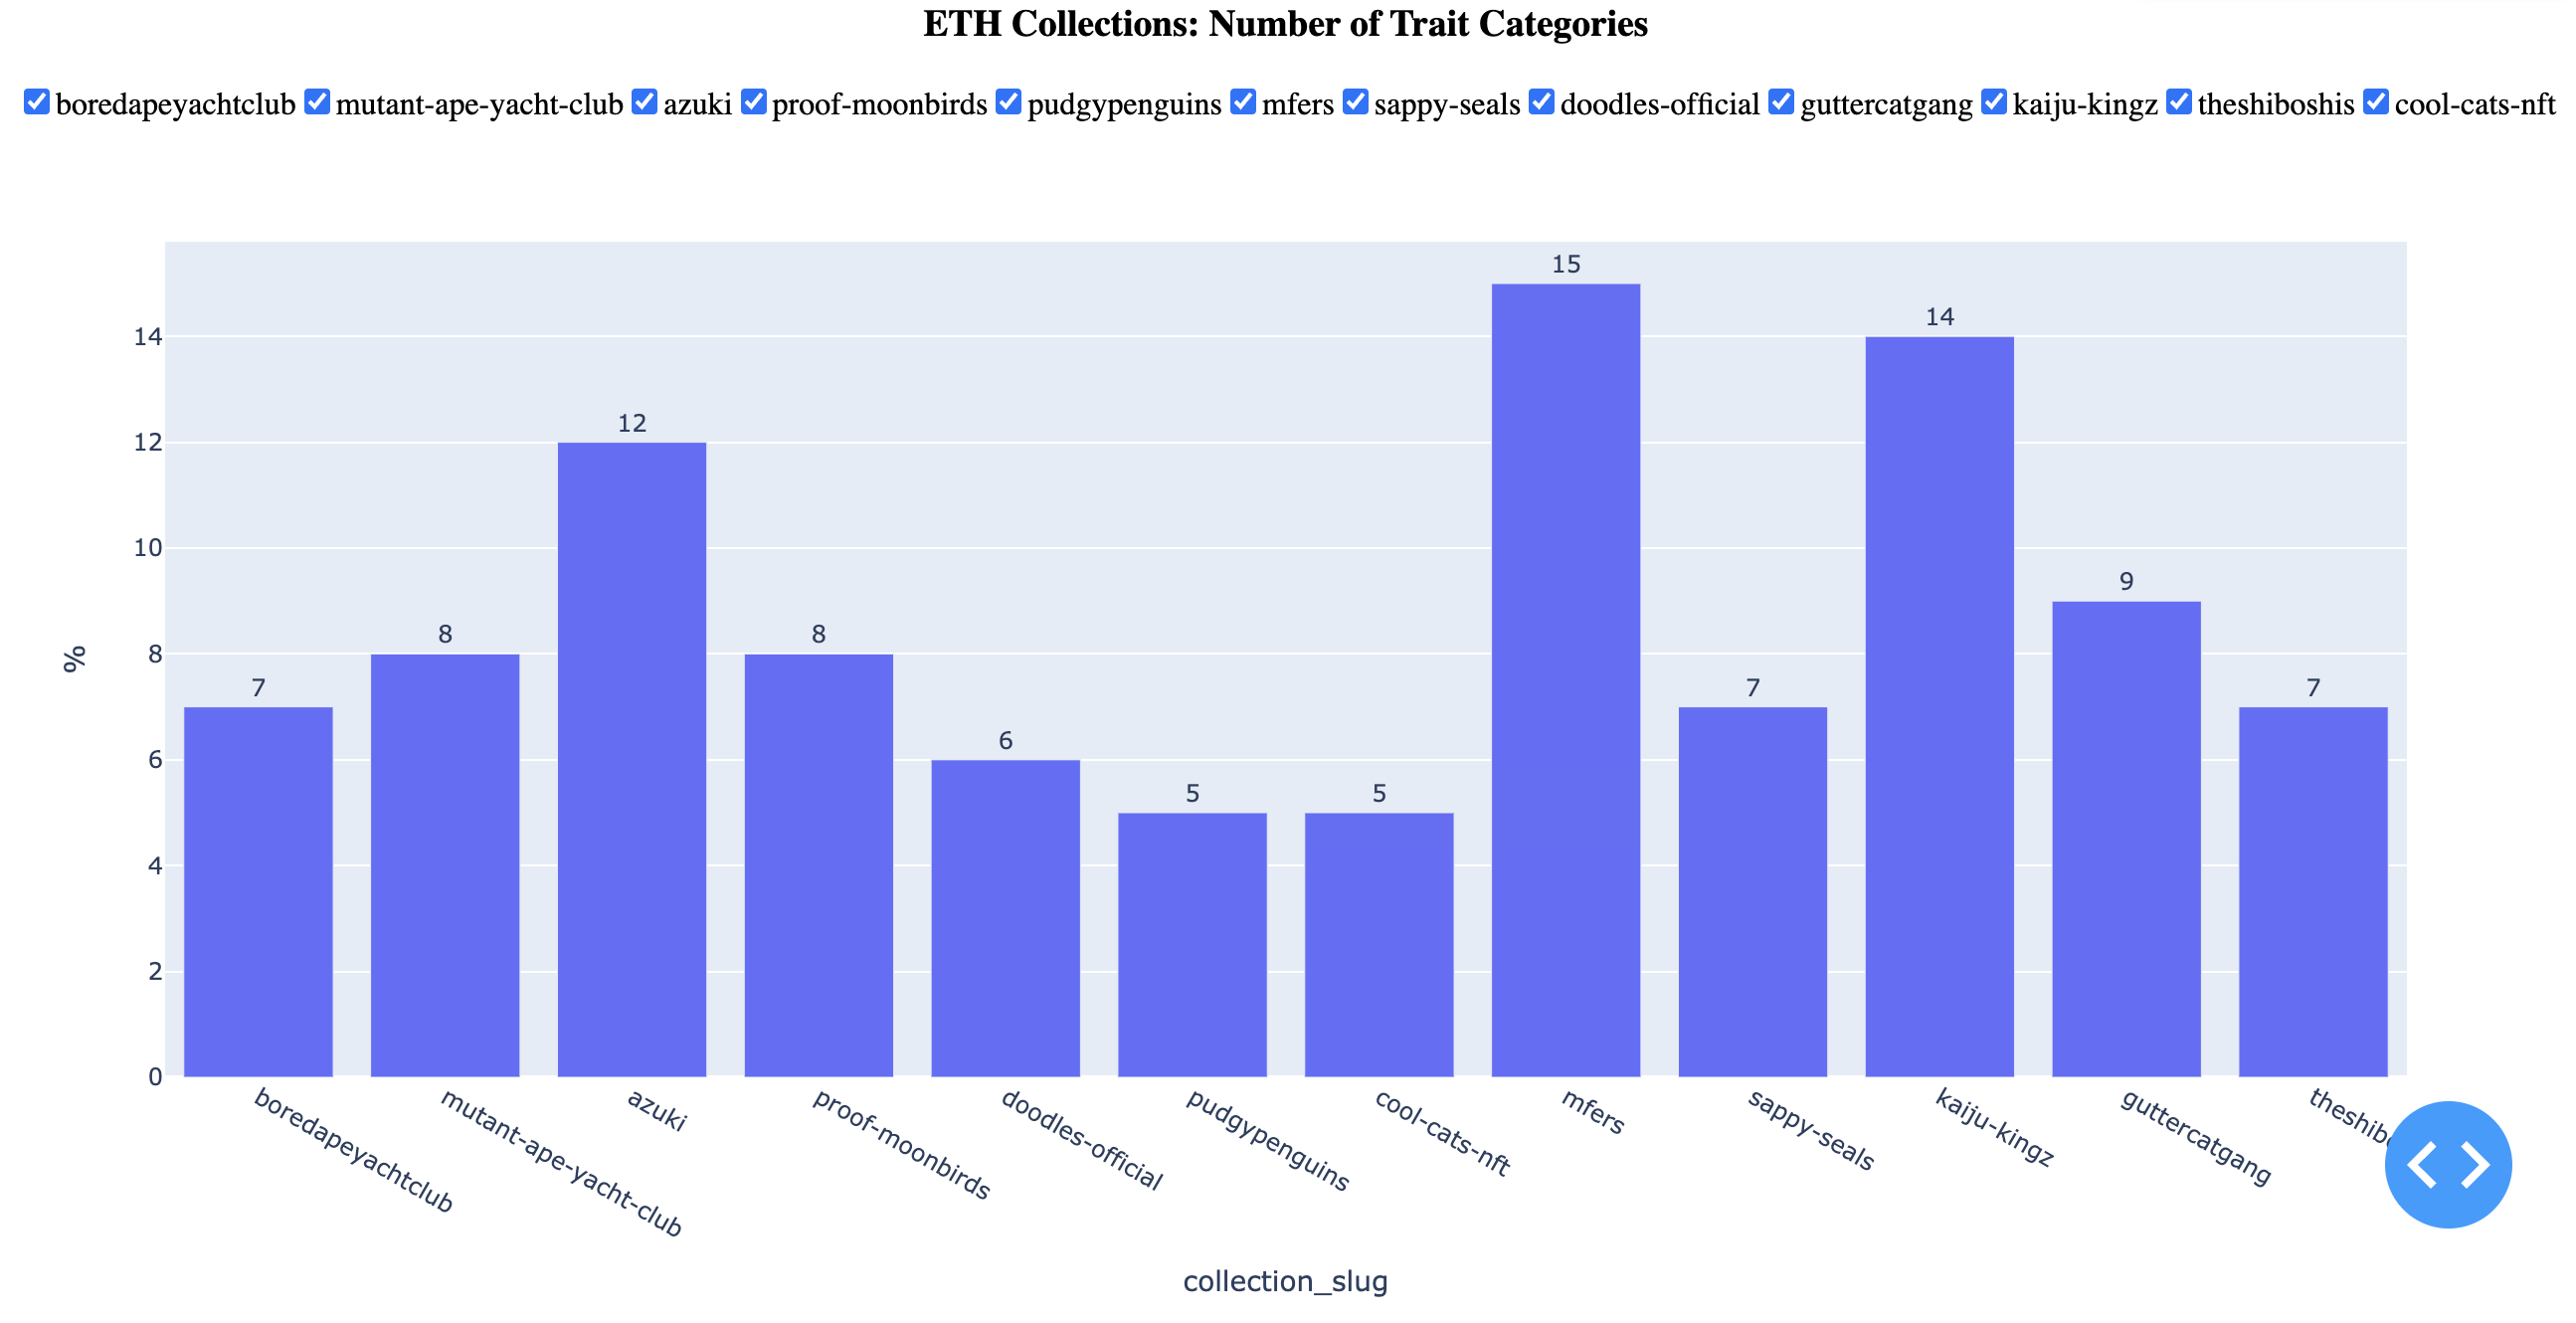

## Number of Total Traits by Project

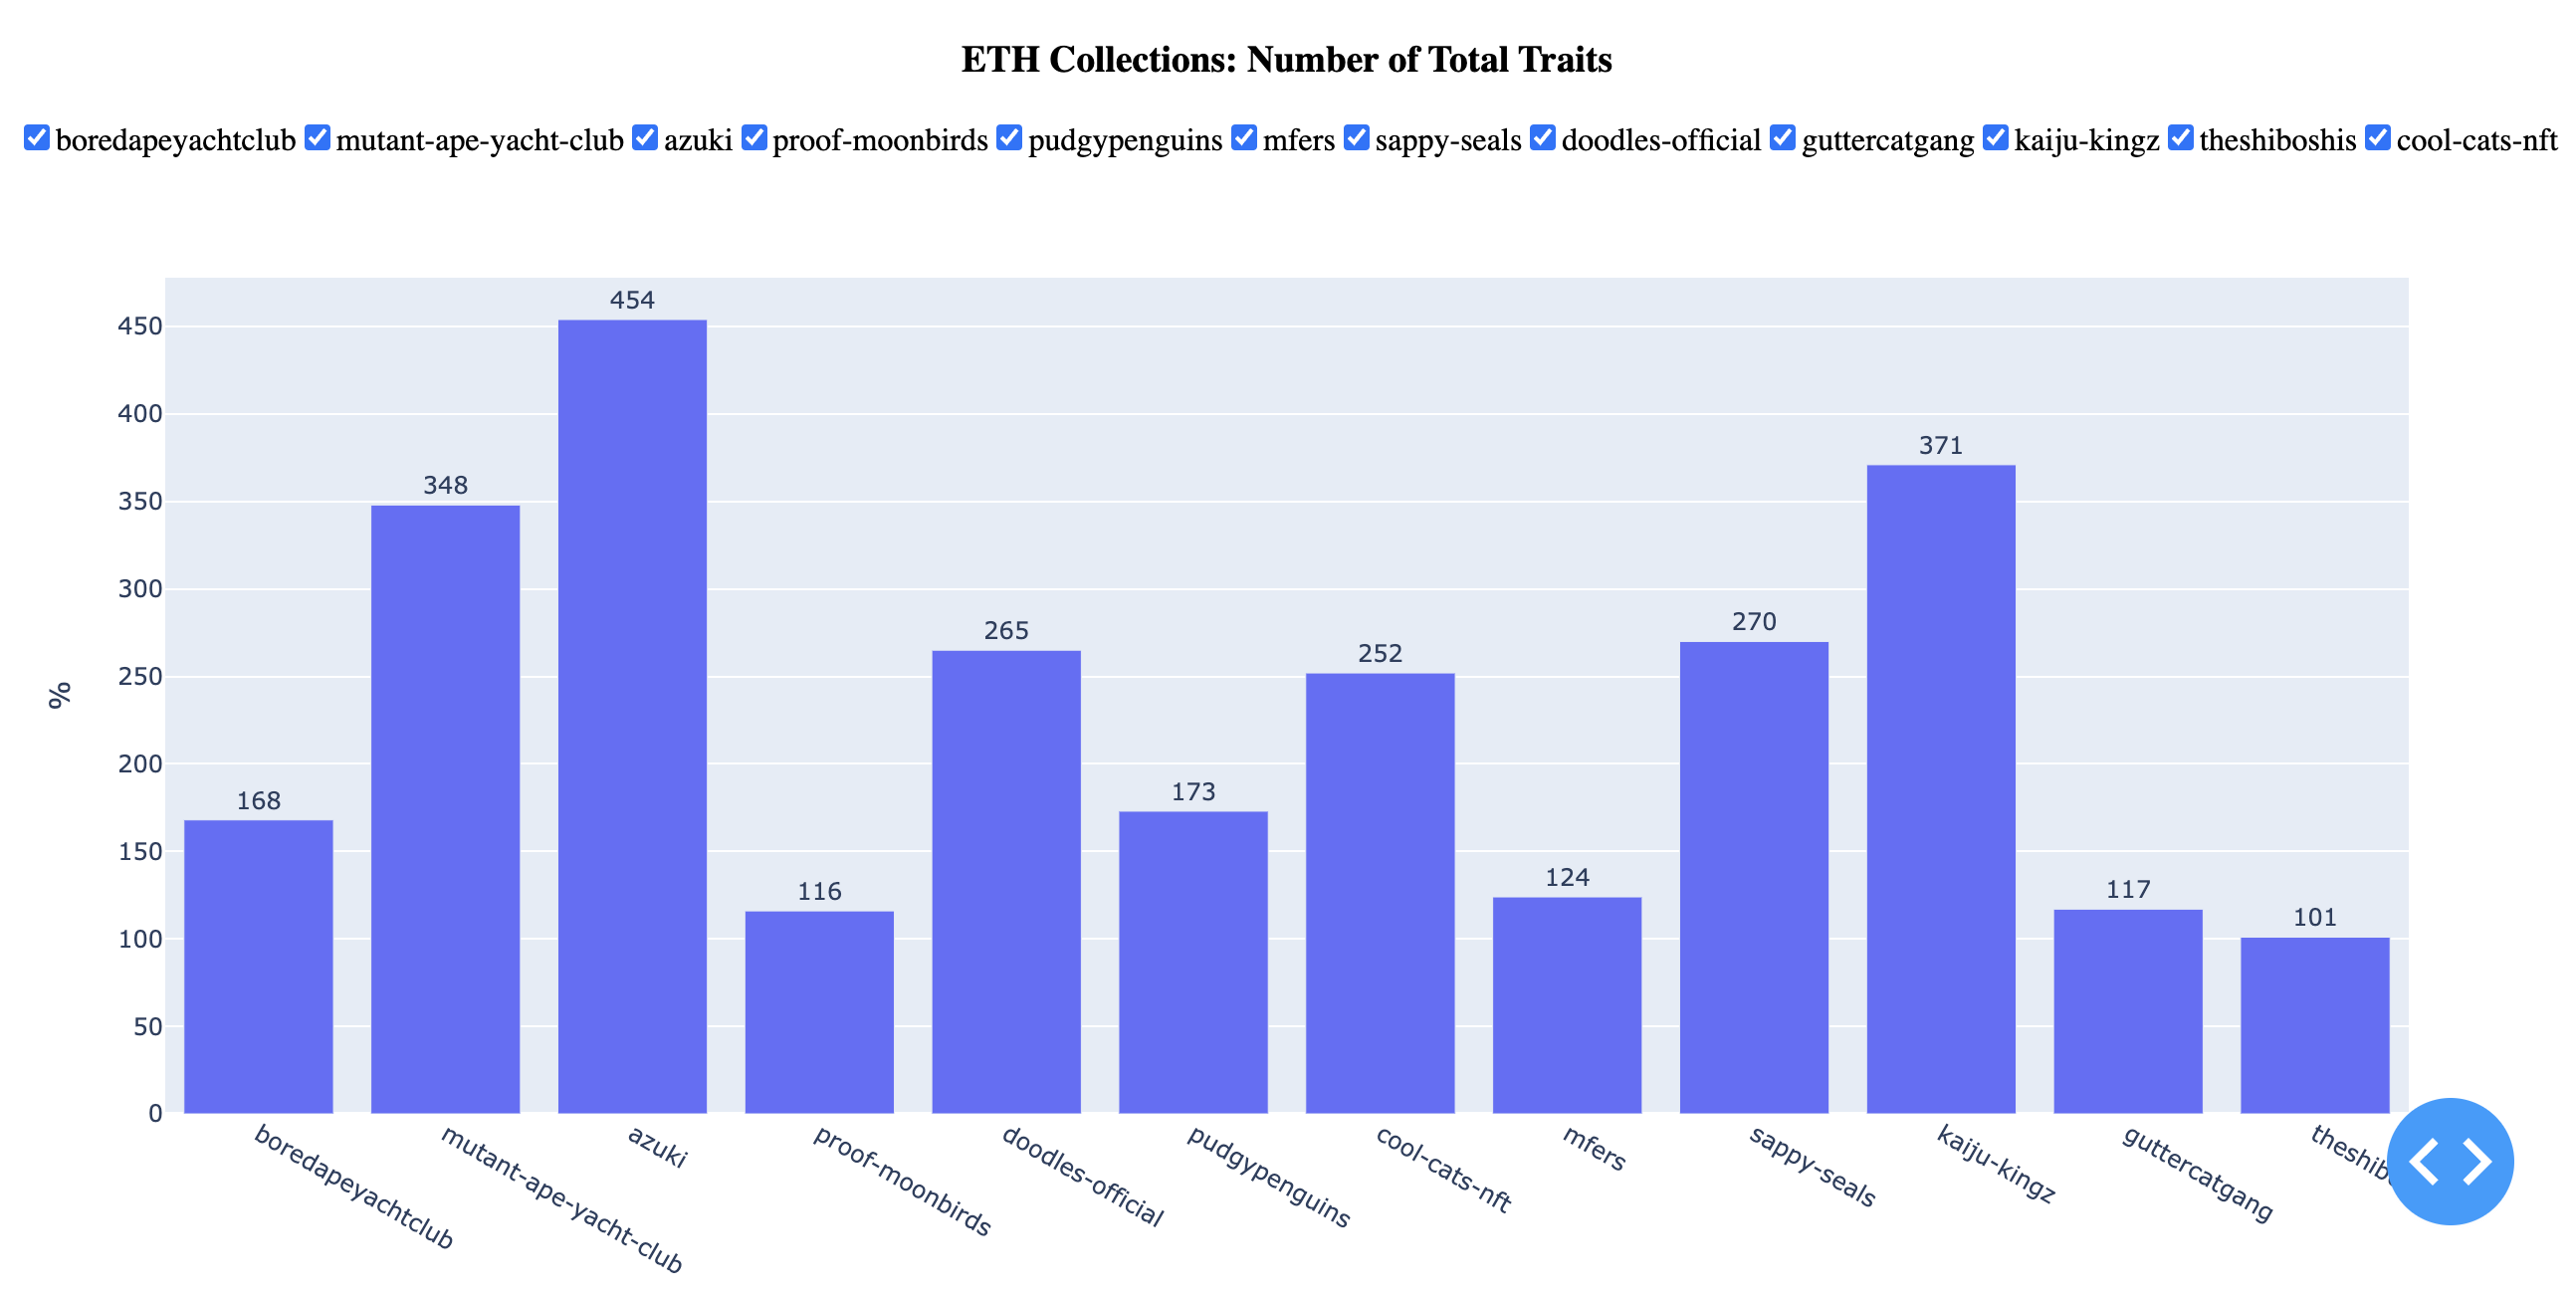

## Collection trait and distributions

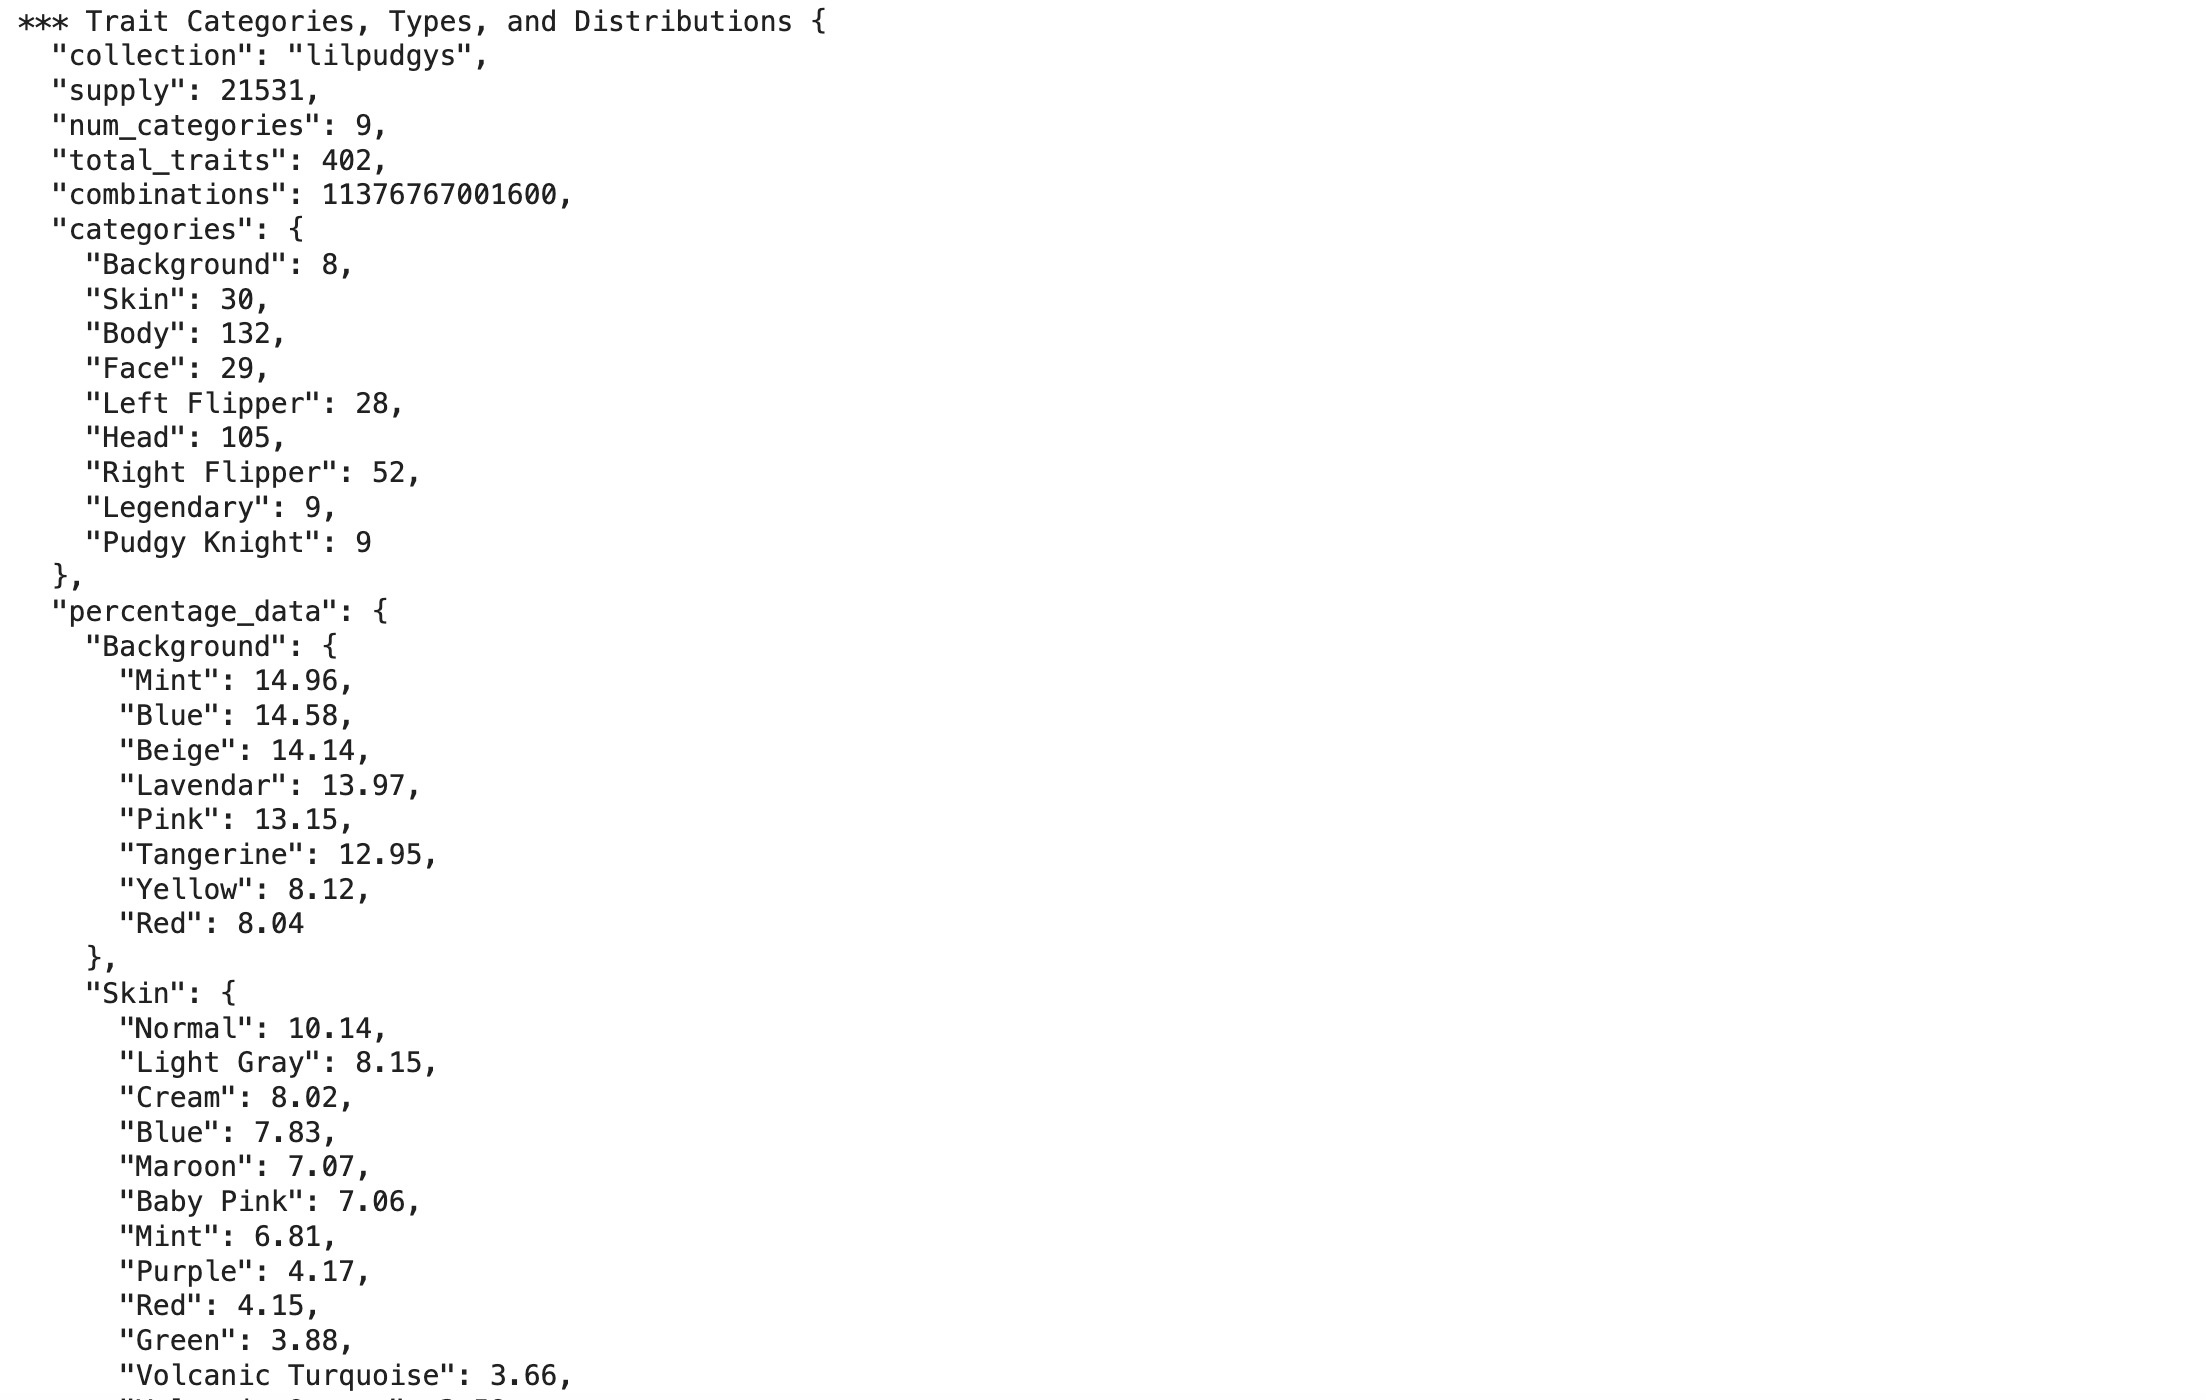